In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv("loan.csv")
dataset.shape

(367, 12)

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<Axes: xlabel='CoapplicantIncome'>

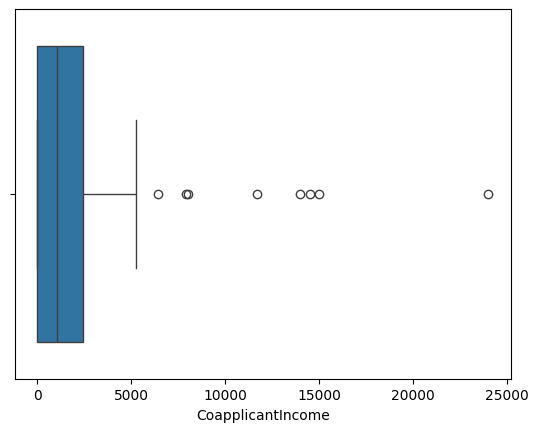

In [7]:
sns.boxplot(x=dataset["CoapplicantIncome"], data=dataset)

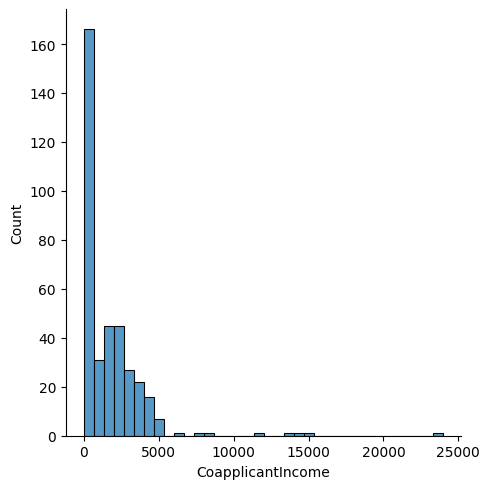

In [8]:
sns.displot(dataset["CoapplicantIncome"])

In [9]:
min_range = dataset["CoapplicantIncome"].mean() - (3*dataset["CoapplicantIncome"].std()) 
max_range =dataset["CoapplicantIncome"].mean() + (3*dataset["CoapplicantIncome"].std()) 

min_range, max_range

(-5433.118639383289, 8572.273952734788)

In [11]:
new_data = dataset[dataset["CoapplicantIncome"]<=max_range]

In [20]:
new_data.shape

(362, 12)

<Axes: xlabel='CoapplicantIncome'>

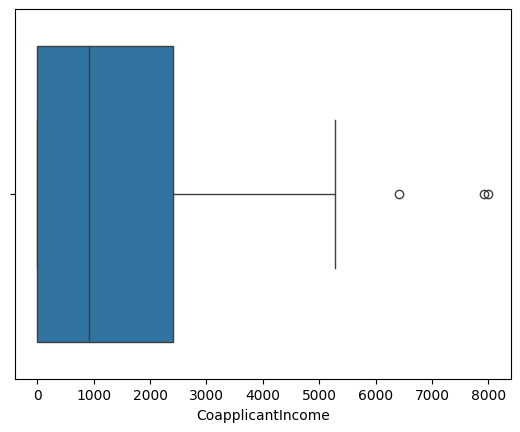

In [13]:
sns.boxplot(x="CoapplicantIncome", data=new_data)

In [14]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/dataset["CoapplicantIncome"].std()
z_score

0     -0.672417
1     -0.029808
2      0.098714
3      0.418306
4     -0.672417
         ...   
362    0.088861
363   -0.368677
364    0.181397
365    0.352759
366   -0.672417
Name: CoapplicantIncome, Length: 367, dtype: float64

In [15]:
dataset["Z-score"] = z_score
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Z-score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,-0.672417
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,-0.029808
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0.098714
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0.418306
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,-0.672417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0.088861
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,-0.368677
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0.181397
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0.352759


In [16]:
dataset[dataset["CoapplicantIncome"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Z-score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,-0.672417
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,-0.672417
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,-0.672417
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,-0.672417
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,-0.672417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,LP002885,Male,No,0,Not Graduate,No,2868,0,70.0,360.0,1.0,Urban,-0.672417
350,LP002899,Male,Yes,2,Graduate,No,8667,0,254.0,360.0,1.0,Rural,-0.672417
357,LP002952,Male,No,0,Graduate,No,2500,0,60.0,360.0,1.0,Urban,-0.672417
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural,-0.672417
